In [2]:
!pip install tweepy

In [4]:
#General:
import tweepy       #To consume twitter's API
import numpy as np  #TO HANDLE DATA
import pandas as pd #To number computing

#for plotting and visualization
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#Twitter app access keys for @user
#consume
CONSUMER_KEY = '6RLG1auHLTr6WJaqwiv05hLcp'
CONSUMER_SECRET = 'nTGvhaWSTd3IwMZxcR8YEmRwg8rQXmRkWOQ5aIHNgTZpeEE1aR'

#Access
ACCESS_TOKEN = '1515145326-8dzMJPTDUBrqS48iUl2zqf8s7ffvIhzrbQLrTQo'
ACCESS_SECRET = 'WOJkvJBG3KrALkd8tllrZoGccnSwx7wj7PfAyYHV21bDk'

In [6]:
#API setup
def twitter_setup():
    """
    utility function to setup Twitter's API
    with our Access key's provided
    """
    #Authentication and access using keys
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    #Return API with Authentication
    api = tweepy.API(auth)
    return api

In [7]:
#we create an Extractor object

extractor = twitter_setup()

#we create a tweet list as follows
tweets = extractor.user_timeline(screen_name = "@narendramodi", count = 200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

#we print the most recent 5 tweets:
print("5 Recent Tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 Recent Tweets:

अपनी समृद्ध संस्कृति और वैभवशाली विरासत के लिए विख्यात राजस्थान के सभी भाइयों और बहनों को राजस्थान दिवस की बहुत-बहुत शुभकामनाएं।

The new edition of #ExamWarriors has been enriched with valuable inputs from students, parents and teachers. 

Subs… https://t.co/Xi8r1WUFUv

How to make exam preparation fun?

Is there anything interesting we can do sitting at home while preparing?

There… https://t.co/lq4VX8I2EF

As the exam season begins, I am delighted to share that the updated edition of #ExamWarriors is now available. 

Th… https://t.co/QqgHkjKbG1

आप सभी को होली की ढेर सारी शुभकामनाएं। आनंद, उमंग, हर्ष और उल्लास का यह त्योहार हर किसी के जीवन में नए जोश और नई ऊर्जा का संचार करे।



In [9]:
#we create a pandas dataframe as follows:

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

#we dispplay the first 10 elements of the dataframe
display(data.head(10))

,Tweets
0,अपनी समृद्ध संस्कृति और वैभवशाली विरासत के लिए...
1,The new edition of #ExamWarriors has been enri...
2,How to make exam preparation fun?\n\nIs there ...
3,"As the exam season begins, I am delighted to s..."
4,"आप सभी को होली की ढेर सारी शुभकामनाएं। आनंद, उ..."
5,Life is all about innovation and learning new ...
6,The sporting successes of our Nari Shakti make...
7,"During today’s #MannKiBaat programme, a very i..."
8,The largest vaccination drive in the world is ...
9,India’s Amrut Mahotsav inspires each of us to ...


In [10]:
#internal methods of a single twwet object
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [11]:
#we print info from the first tweet

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


1376716165897129984
2021-03-30 02:01:26
Twitter for iPhone
37459
4881
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [12]:
#we add relevant data

data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])


In [13]:
#Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,अपनी समृद्ध संस्कृति और वैभवशाली विरासत के लिए...,128,1376716165897129984,2021-03-30 02:01:26,Twitter for iPhone,37459,4881
1,The new edition of #ExamWarriors has been enri...,140,1376490524643786754,2021-03-29 11:04:49,Twitter Web App,17138,3310
2,How to make exam preparation fun?\n\nIs there ...,139,1376490324898406403,2021-03-29 11:04:02,Twitter Web App,10998,2308
3,"As the exam season begins, I am delighted to s...",140,1376489984186744839,2021-03-29 11:02:40,Twitter Web App,13104,2561
4,"आप सभी को होली की ढेर सारी शुभकामनाएं। आनंद, उ...",132,1376344887033962499,2021-03-29 01:26:06,Twitter for iPhone,160913,23335
5,Life is all about innovation and learning new ...,140,1376145672144097284,2021-03-28 12:14:30,Twitter Media Studio,13019,2973
6,The sporting successes of our Nari Shakti make...,97,1376145115182432256,2021-03-28 12:12:17,Twitter Media Studio,21760,3665
7,"During today’s #MannKiBaat programme, a very i...",140,1376145020353413125,2021-03-28 12:11:55,Twitter Media Studio,6780,1772
8,The largest vaccination drive in the world is ...,140,1376144931882930177,2021-03-28 12:11:33,Twitter Media Studio,10035,2162
9,India’s Amrut Mahotsav inspires each of us to ...,138,1376144804069978113,2021-03-28 12:11:03,Twitter Media Studio,8420,2157


In [14]:
#we extract the mean of lenghts:

mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 126.755


In [15]:
#we extract the tweet with more FAVsand RTs:

fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

print(fav)
print(rt)

4
190


In [16]:
# max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of Likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
आप सभी को होली की ढेर सारी शुभकामनाएं। आनंद, उमंग, हर्ष और उल्लास का यह त्योहार हर किसी के जीवन में नए जोश और नई ऊर्जा का संचार करे।
Number of Likes: 160913
132 characters.

The tweet with more retweets is: 
बहुत बढ़िया! https://t.co/55ViOzefjQ
Number of retweets: 26084
36 characters.



In [17]:
#we obtain all possible sources:

sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

#we print sources list:
print("creation of content sources:")
for source in sources:
    print(" {}".format(source))

creation of content sources:
 Twitter for iPhone
 Twitter Web App
 Twitter Media Studio
 Periscope


In [18]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

In [19]:
print(tlen)
print(tfav)
print(tret)

Date
2021-03-30 02:01:26    128
2021-03-29 11:04:49    140
2021-03-29 11:04:02    139
2021-03-29 11:02:40    140
2021-03-29 01:26:06    132
                      ... 
2021-03-09 15:21:41    140
2021-03-09 14:43:04    140
2021-03-09 14:18:03    140
2021-03-09 14:17:41    139
2021-03-09 14:17:07    140
Length: 200, dtype: int32
Date
2021-03-30 02:01:26     37459
2021-03-29 11:04:49     17138
2021-03-29 11:04:02     10998
2021-03-29 11:02:40     13104
2021-03-29 01:26:06    160913
                        ...  
2021-03-09 15:21:41     15885
2021-03-09 14:43:04     22416
2021-03-09 14:18:03     11216
2021-03-09 14:17:41      9844
2021-03-09 14:17:07      8421
Length: 200, dtype: int32
Date
2021-03-30 02:01:26     4881
2021-03-29 11:04:49     3310
2021-03-29 11:04:02     2308
2021-03-29 11:02:40     2561
2021-03-29 01:26:06    23335
                       ...  
2021-03-09 15:21:41     3973
2021-03-09 14:43:04     3604
2021-03-09 14:18:03     2727
2021-03-09 14:17:41     2514
2021-03-09 14:17

<AxesSubplot:xlabel='Date'>

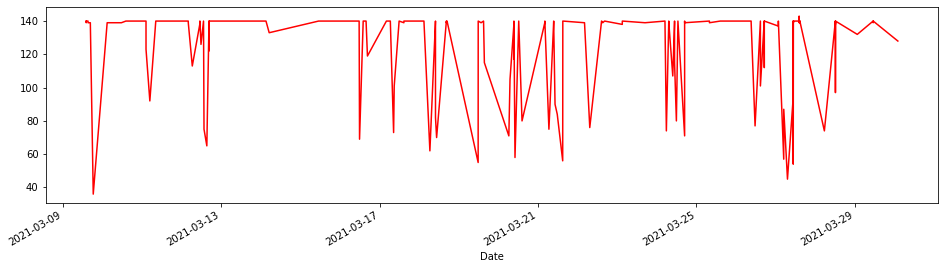

In [20]:
#lenghts along time:
tlen.plot(figsize=(16,4), color='r')


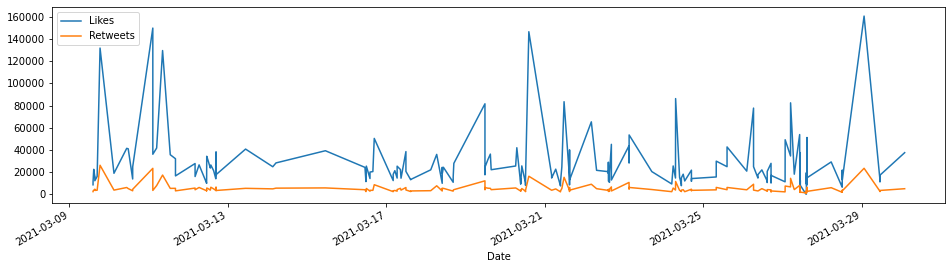

In [21]:
#likes vs retweets visualisation:

tfav.plot(figsize=(16,4), label='Likes',legend=True)
tret.plot(figsize=(16,4), label='Retweets', legend=True);


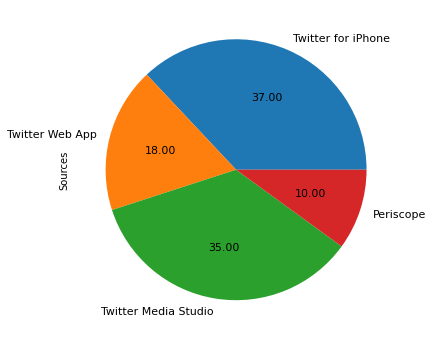

In [22]:
#we create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
percent /= 100

#pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct= '%.2f', figsize=(6,6));
    

In [24]:
!pip install textblob

In [25]:
#sentiment analysis

from textblob import TextBlob
import re                         #regular expression

def clean_tweet(tweet):
    """
    utility function to clean the text in a tweet by removing
    links and speacial characters using regex.
    """
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    """
    utility function to classify the priority of a tweet
    using textblobs
    """
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [26]:
#create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

#we displaqy the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,अपनी समृद्ध संस्कृति और वैभवशाली विरासत के लिए...,128,1376716165897129984,2021-03-30 02:01:26,Twitter for iPhone,37459,4881,0
1,The new edition of #ExamWarriors has been enri...,140,1376490524643786754,2021-03-29 11:04:49,Twitter Web App,17138,3310,1
2,How to make exam preparation fun?\n\nIs there ...,139,1376490324898406403,2021-03-29 11:04:02,Twitter Web App,10998,2308,1
3,"As the exam season begins, I am delighted to s...",140,1376489984186744839,2021-03-29 11:02:40,Twitter Web App,13104,2561,1
4,"आप सभी को होली की ढेर सारी शुभकामनाएं। आनंद, उ...",132,1376344887033962499,2021-03-29 01:26:06,Twitter for iPhone,160913,23335,0
5,Life is all about innovation and learning new ...,140,1376145672144097284,2021-03-28 12:14:30,Twitter Media Studio,13019,2973,1
6,The sporting successes of our Nari Shakti make...,97,1376145115182432256,2021-03-28 12:12:17,Twitter Media Studio,21760,3665,1
7,"During today’s #MannKiBaat programme, a very i...",140,1376145020353413125,2021-03-28 12:11:55,Twitter Media Studio,6780,1772,1
8,The largest vaccination drive in the world is ...,140,1376144931882930177,2021-03-28 12:11:33,Twitter Media Studio,10035,2162,1
9,India’s Amrut Mahotsav inspires each of us to ...,138,1376144804069978113,2021-03-28 12:11:03,Twitter Media Studio,8420,2157,1


In [27]:
#we construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [28]:
print("Percent of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percent of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percent of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percent of positive tweets: 33.0%
Percent of neutral tweets: 65.5%
Percent of negative tweets: 1.5%
